Run on NERSC

Split HSC truth catalog to smaller chunks.

In [1]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import fitsio

In [27]:
hsc = fitsio.read('/project/projectdirs/desi/target/analysis/truth/parent/hsc_pdr1_wide.forced.reduced.fits', columns=['ra', 'dec'])
print(len(hsc))

13899134


In [28]:
idx = np.random.choice(len(hsc), size=len(hsc)//10, replace=False)
hsc = hsc[idx]
print(len(hsc))

1389913


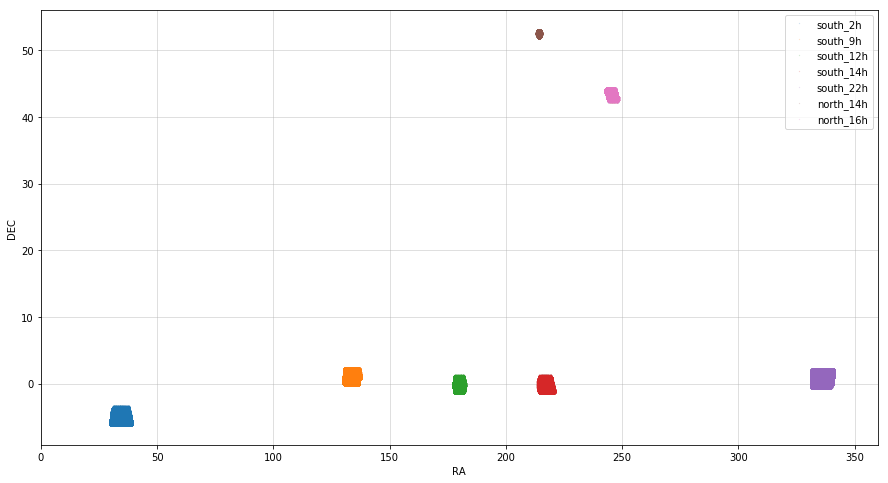

1389913


In [30]:
regions = ['south_2h', 'south_9h', 'south_12h', 'south_14h', 'south_22h', 'north_14h', 'north_16h']
ra_range = [[0, 50], [100, 150], [150, 200], [200, 250], [300, 350], [200, 225], [225, 250]]

plt.figure(figsize=(15, 8))

mask_all = np.zeros(len(hsc), dtype=bool)
for index in range(len(regions)):
    region_name = regions[index]
    if region_name.startswith('south'):
        mask = hsc['dec']<30
    else:
        mask = hsc['dec']>30
    mask &= (hsc['ra']>ra_range[index][0]) & (hsc['ra']<ra_range[index][1])
    
    if np.sum(mask_all & mask)!=0:
        print('There is overlap!!!')

    mask_all |= mask
    
    plt.plot(hsc['ra'][mask], hsc['dec'][mask], '.', markersize=0.3, alpha=0.5, label=region_name)

plt.xlabel('RA')
plt.ylabel('DEC')
plt.xlim(0, 360)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

print(np.sum(mask_all))